WorldCup tweet sentiment analysis will be done based on tweets related to worldcup.

This is a time of worldcup and social media might be full of activities related to worldcup. Most of us pick a side with country and make post based on them or against other teams. I remember getting angry with friend while being on the opposite team during worldcup. Since we are busy in social media and we share opinion of ours in it, we could be part of heated arguments too. But can we detect those? Let's use sentiment analysis in them.

## Getting Tweet Data
First step is to get tweet data related to worldcup and to do that, we will use Tweepy. I have written a walkthrough blog to use Tweepy to get tweets using Tweeter API and you can read it below.
* [Tweet Scraping Using Tweepy](https://q-viper.github.io/2022/06/04/scraping-tweets-with-tweepy/)

But first step is to install latest Tweepy:

* `!pip install git+https://github.com/tweepy/tweepy.git`


In [1]:
!pip install git+https://github.com/tweepy/tweepy.git

  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git 'C:\Users\Viper\AppData\Local\Temp\pip-req-build-t4466103'



  Cloning https://github.com/tweepy/tweepy.git to c:\users\viper\appdata\local\temp\pip-req-build-t4466103
  Resolved https://github.com/tweepy/tweepy.git to commit 4b0fa90e91eb2b67dfd33f0d27b148e95ea05f65
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


## Setting Keys
Lets set keys as below:

```python
api_key="api_key here"
secret="secret key here"
bearer="bearer here"
access_token="access_token here"
access_token_secret="access_token_secret here"
```

In [2]:
api_key=""
secret=""
bearer=""
access_token=""
access_token_secret=""

## Making a Connection
Now that our keys are set lets make a connection to API using tweepy.

In [3]:
import tweepy as tw

api_key= api_key
api_secret= secret


auth = tw.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


If no error shown then it worked!

## A Function to get Related Tweets
This is taken from the above blog.

In [9]:
import json,csv,time,os
import pandas as pd

def get_related_tweets(key_words, language="en", max_tweets=5000, max_items=500):
    fname=language+str(time.time())+".csv"
    print(f"Filename {fname}")
    
    count=0
    tweets=max_tweets
    
    for key_word in key_words:
        print(f"Current Keyword: {key_word}")
        for tweet in tw.Cursor(api.search_tweets,
                               q=key_word, count=max_items).items(max_items):
            
            tweet_created_at = []
            text = []
            user=[]
            hashtags = []
            user_mentions = []
            in_reply = []
            protected = []
            followers_count = [] 
            friends_count = []
            listed_count = []
            created_at = []
            favourites_count = []
            geo_enabled = []
            verified =[]
            statuses_count=[]
            coordinates=[]
            is_quote_status=[]
            retweet_count=[]
            favorited=[]
            retweeted=[]
            source = []
            place=[]
            lang=[]
            kwd=[]
            ids=[]
            locations=[]
            description=[]

            if tweet.lang!=language:
                continue
            count+=1
            try:
              tweet_created_at.append(tweet.created_at)
              status = api.get_status(tweet.id, tweet_mode="extended")
              try:
                  txt = status.retweeted_status.full_text
              except AttributeError:  
                  txt = status.full_text

              description.append(tweet.user.description)
              locations.append(tweet.user.location)
              ids.append(tweet.id)
              text.append(txt)
              user.append(tweet.user.screen_name)
              hashtags.append(tweet.entities["hashtags"])
              user_mentions.append(len(tweet.entities["user_mentions"]))
              in_reply.append(tweet.in_reply_to_status_id)
              protected.append(tweet.user.protected)
              followers_count.append(tweet.user.followers_count)
              friends_count.append(tweet.user.friends_count)
              listed_count.append(tweet.user.listed_count)
              created_at.append(tweet.user.created_at)
              favourites_count.append(tweet.user.favourites_count)
              geo_enabled.append(tweet.user.geo_enabled)
              verified.append(tweet.user.verified)
              statuses_count.append(tweet.user.statuses_count)
              coordinates.append(tweet.coordinates)
              is_quote_status.append(tweet.is_quote_status)
              retweet_count.append(tweet.retweet_count)
              favorited.append(tweet.favorited)
              retweeted.append(tweet.retweeted)
              source.append(tweet.source)
              place.append(tweet.place)
              lang.append(tweet.lang)
              kwd.append(key_word)

              dict_data={"id":ids,'tweet_created_at':tweet_created_at, 
                                    'text': text, 'user': user, "bio":description,"location":locations,
                                    "hashtags":hashtags, "user_mentions":user_mentions,
                                    "in_reply":in_reply, "protected":protected, "followers_count":followers_count,
                                    "friends_count":friends_count, "listed_count":listed_count, "created_at":created_at,
                                    "favourites_count":favourites_count, "geo_enabled":geo_enabled, "verified":verified,
                                    "statuses_count":statuses_count, "coordinates":coordinates, "is_quote_status":is_quote_status,
                                    "retweet_count":retweet_count,
                                    "retweeted":retweeted,"lang":lang,
                                    "source":source,"place":place,"kwd":key_word}
              csv_columns=list(dict_data.keys())
              dict_data = {k:v[0] for k,v in dict_data.items()}
              if os.path.isfile(fname):  
                # print("File Exists")
                pass
              else:
                # print("File does not exist")
                with open(fname, 'a', encoding='utf-8') as csvfile:
                  writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
                  writer.writeheader()

              with open(fname, 'a', encoding='utf-8') as csvfile:
                  writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
                  for data in [dict_data]:
                      writer.writerow(data)

              if count>=tweets:
                break
            except:
              print("Something is wrong. Skipping this tweet.")
    
    return pd.read_csv(fname, parse_dates=["tweet_created_at","created_at"])

In [10]:
kwds = ['worldcup', 'world cup', 'wcup', 'football', 'qatar worldcup prediction']
get_related_tweets(kwds)

Filename en1670670038.8448372.csv
Current Keyword: worldcup
Current Keyword: world cup
Current Keyword: wcup
Current Keyword: football
Something is wrong. Skipping this tweet.
Something is wrong. Skipping this tweet.
Current Keyword: qatar worldcup prediction


Rate limit reached. Sleeping for: 174


,id,tweet_created_at,text,user,bio,location,hashtags,user_mentions,in_reply,protected,...,verified,statuses_count,coordinates,is_quote_status,retweet_count,retweeted,lang,source,place,kwd
0,1601532325241950209,2022-12-10 11:00:36+00:00,"@mcbenwell @TheTotallyShow Unsurprisingly, thi...",DrLouiseClare1,"Historian looking at Argentine, British and US...",NaN,[],2,1.601523e+18,False,...,False,1187,NaN,False,0,False,en,Twitter for iPhone,NaN,w
1,1601532314613334018,2022-12-10 11:00:33+00:00,All the best to England playing in the quarter...,bookajet,Enjoy freedom without responsibility and let y...,Farnborough Airport,"[{'text': 'worldcup', 'indices': [61, 70]}, {'...",0,NaN,False,...,False,959,NaN,False,0,False,en,Hootsuite Inc.,NaN,w
2,1601532312696811520,2022-12-10 11:00:33+00:00,1/It's Matchday⚽️\r\n\r\nShow support to your ...,0xNeverWinn,@GaHunter688 suspended,NaN,"[{'text': 'worldcup', 'indices': [61, 70]}, {'...",1,NaN,False,...,False,8442,NaN,False,4472,False,en,Twitter Web App,NaN,w
3,1601532303762677762,2022-12-10 11:00:30+00:00,Good Luck England ⚽⚽⚽\r\n #Itscominghome #Worl...,3LionsOnMaShirt,Sharing the latest #ThreeLions news and fan ta...,"Manchester, England","[{'text': 'Itscominghome', 'indices': [40, 54]...",1,NaN,False,...,False,157,NaN,False,1,False,en,VillaBotMan,NaN,w
4,1601532286507552768,2022-12-10 11:00:26+00:00,Guess the Quarter Final Winners ⚽️🥂\r\n\r\nThe...,EdehRonald,crypto enthusiast/trader,NaN,"[{'text': 'WorldcupQatar2022', 'indices': [64,...",1,NaN,False,...,False,92,NaN,False,24,False,en,Twitter for Android,NaN,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1600634805494112256,2022-12-07 23:34:10+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,YuaXie1,Xie,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q
1845,1600634015593046016,2022-12-07 23:31:02+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,MiaKhezia,Mia,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q
1846,1600633247909965824,2022-12-07 23:27:59+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,RiaHarianto1818,True Love,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q
1847,1600632624745435136,2022-12-07 23:25:30+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,RinaPort3,Yooo,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q


Now lets read that csv file.

In [11]:
df = pd.read_csv('en1670670038.8448372.csv')
df

,id,tweet_created_at,text,user,bio,location,hashtags,user_mentions,in_reply,protected,...,verified,statuses_count,coordinates,is_quote_status,retweet_count,retweeted,lang,source,place,kwd
0,1601532325241950209,2022-12-10 11:00:36+00:00,"@mcbenwell @TheTotallyShow Unsurprisingly, thi...",DrLouiseClare1,"Historian looking at Argentine, British and US...",NaN,[],2,1.601523e+18,False,...,False,1187,NaN,False,0,False,en,Twitter for iPhone,NaN,w
1,1601532314613334018,2022-12-10 11:00:33+00:00,All the best to England playing in the quarter...,bookajet,Enjoy freedom without responsibility and let y...,Farnborough Airport,"[{'text': 'worldcup', 'indices': [61, 70]}, {'...",0,NaN,False,...,False,959,NaN,False,0,False,en,Hootsuite Inc.,NaN,w
2,1601532312696811520,2022-12-10 11:00:33+00:00,1/It's Matchday⚽️\r\n\r\nShow support to your ...,0xNeverWinn,@GaHunter688 suspended,NaN,"[{'text': 'worldcup', 'indices': [61, 70]}, {'...",1,NaN,False,...,False,8442,NaN,False,4472,False,en,Twitter Web App,NaN,w
3,1601532303762677762,2022-12-10 11:00:30+00:00,Good Luck England ⚽⚽⚽\r\n #Itscominghome #Worl...,3LionsOnMaShirt,Sharing the latest #ThreeLions news and fan ta...,"Manchester, England","[{'text': 'Itscominghome', 'indices': [40, 54]...",1,NaN,False,...,False,157,NaN,False,1,False,en,VillaBotMan,NaN,w
4,1601532286507552768,2022-12-10 11:00:26+00:00,Guess the Quarter Final Winners ⚽️🥂\r\n\r\nThe...,EdehRonald,crypto enthusiast/trader,NaN,"[{'text': 'WorldcupQatar2022', 'indices': [64,...",1,NaN,False,...,False,92,NaN,False,24,False,en,Twitter for Android,NaN,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844,1600634805494112256,2022-12-07 23:34:10+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,YuaXie1,Xie,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q
1845,1600634015593046016,2022-12-07 23:31:02+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,MiaKhezia,Mia,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q
1846,1600633247909965824,2022-12-07 23:27:59+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,RiaHarianto1818,True Love,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q
1847,1600632624745435136,2022-12-07 23:25:30+00:00,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,RinaPort3,Yooo,NaN,[],1,NaN,False,...,False,30,NaN,False,1144,False,en,Twitter for Android,NaN,q


## Cleaning Tweet Text
Looking into the tweet text above, we can see many noises like @, hashtags, hyper links, so lets remove them and pre-process text to usable format.

In [13]:
import re, string

def remove_noise(tweet):
        '''
        To remove noise
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

lower = lambda x: str(x).lower()
remove_punctuation = lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x)
remove_new_line = lambda x: re.sub('\n', '', x)
remove_numbers = lambda x: re.sub('\w*\d\w*', '', x)
remove_html = lambda x: re.sub('https?://\S+|www\.\S+', '', str(x))
remove_symbols = lambda x: re.sub('<.*?>+', '', re.sub('\[.*?\]', '', x))




The function `remove_noise` does the job but just to be on the safe side other function is also recommended.

In [16]:
df['ctext'] = df.text.apply(remove_noise)
df[['text', 'ctext']]

,text,ctext
0,"@mcbenwell @TheTotallyShow Unsurprisingly, thi...",Unsurprisingly this has been all over the inte...
1,All the best to England playing in the quarter...,All the best to England playing in the quarter...
2,1/It's Matchday⚽️\r\n\r\nShow support to your ...,1 It s Matchday Show support to your worldcup ...
3,Good Luck England ⚽⚽⚽\r\n #Itscominghome #Worl...,Good Luck England Itscominghome Worldcup Three...
4,Guess the Quarter Final Winners ⚽️🥂\r\n\r\nThe...,Guess the Quarter Final Winners The four World...
...,...,...
1844,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,PREDICTION 30 WORLD CUP WINNER Who will be the...
1845,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,PREDICTION 30 WORLD CUP WINNER Who will be the...
1846,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,PREDICTION 30 WORLD CUP WINNER Who will be the...
1847,🔮 PREDICTION #30: WORLD CUP WINNER ⚽️\r\n\r\nW...,PREDICTION 30 WORLD CUP WINNER Who will be the...


The emoji, @, # all are gone but there are still numbers present and I do not think that would affect the result. 

## Getting Sentiment
For this, we need to install Python Package textblob.

`pip install textblob`

In [15]:
from textblob import TextBlob

def get_sentiment(tweet):
    analysis = TextBlob(remove_noise(tweet))
    # set sentiment
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'


In [17]:
df['sentiment'] = df.ctext.apply(get_sentiment)
df[['ctext', 'sentiment']]

,ctext,sentiment
0,Unsurprisingly this has been all over the inte...,positive
1,All the best to England playing in the quarter...,positive
2,1 It s Matchday Show support to your worldcup ...,positive
3,Good Luck England Itscominghome Worldcup Three...,positive
4,Guess the Quarter Final Winners The four World...,neutral
...,...,...
1844,PREDICTION 30 WORLD CUP WINNER Who will be the...,neutral
1845,PREDICTION 30 WORLD CUP WINNER Who will be the...,neutral
1846,PREDICTION 30 WORLD CUP WINNER Who will be the...,neutral
1847,PREDICTION 30 WORLD CUP WINNER Who will be the...,neutral


### Plot Sentiment Distribution
Lets plot worldcup tweet sentiment analysis in histogram.

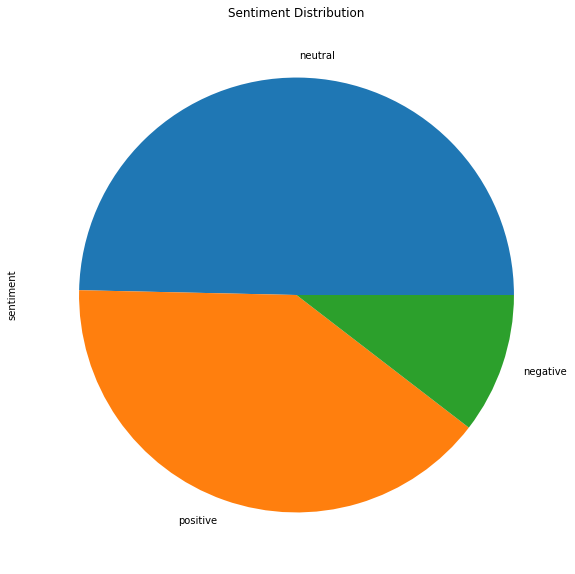

In [52]:
import matplotlib.pyplot as plt

df.sentiment.value_counts().plot(kind='pie', figsize=(15,10))
plt.title('Sentiment Distribution')
plt.show()

Many seems to be on the neutral side.

## Sentiment Based on Users
From the data we collected, we could do further analysis like how many of the users actually made tweets and how many are on neutral and negative sides?
But first let's see how many of unique users are there?

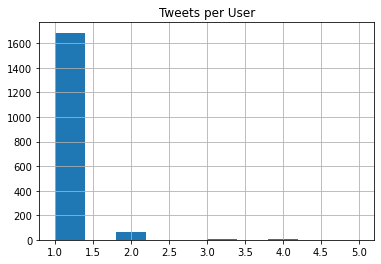

In [38]:

df.user.value_counts().hist()
plt.title('Tweets per User')
plt.show()

It seems that there are only few users who did more than one tweet.

## Distribution of Source

But there are many sources and our plot will be ugly if we plot distribution of them all. So let's plot of only top 3 sources.

In [25]:
df.source.unique()

array(['Twitter for iPhone', 'Hootsuite Inc.', 'Twitter Web App',
       'VillaBotMan', 'Twitter for Android', 'infolinity', 'HubSpot',
       'yorkshire-times', 'Buffer', 'TweetDeck', 'Focus For Twitter',
       'Blog2Social APP', 'Metro_NFTs', 'IFTTT', 'Twitter for iPad',
       'RageOfFifaAutoTweeter', 'Instagram', 'BIGO LIVE', 'Sprout Social',
       'Valurank', 'Echobox', 'grow_bot', 'Jetpack.com',
       'Tweetbot for iΟS', 'dlvr.it', 'Paiger', 'Bot Libre!',
       'Twitter Ads', 'cmssocialservice', 'Twitter Media Studio',
       'BestTLDApp', 'THEDOTBEST', 'BestTLD', 'NigNewspapers',
       'SMAP Lite', 'GilgameshJpnBot', 't2r app 2',
       'Cheap Bots, Done Quick!', 'SocialFlow', 'Typefully',
       'Twitter for Advertisers', 'Post Planner Inc.',
       'TweetCaster for Android', 'mem-dev1', 'ScotchEggBot'],
      dtype=object)

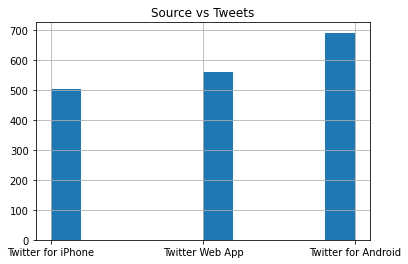

In [37]:
df[df.source.isin(df.source.value_counts().keys()[:3])].source.hist()
plt.title('Source vs Tweets')
plt.show()

It seems that android users are most.

## Tweets Per Day
We have a column `tweet_created_at` which means when the tweet was created and we can plot to see how many tweets were made in particular day. And further more we could view what is the sentiment distribution throughout the days.

In [31]:
pd.to_datetime(df.tweet_created_at).dt.date

0       2022-12-10
1       2022-12-10
2       2022-12-10
3       2022-12-10
4       2022-12-10
           ...    
1844    2022-12-07
1845    2022-12-07
1846    2022-12-07
1847    2022-12-07
1848    2022-12-07
Name: tweet_created_at, Length: 1849, dtype: object

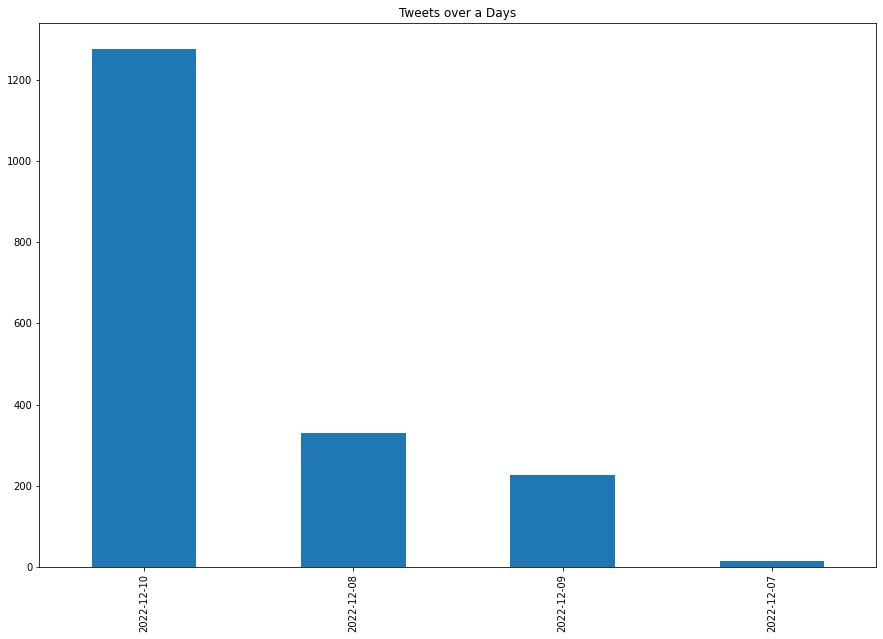

In [36]:
df['date'] = pd.to_datetime(df.tweet_created_at).dt.date
df.date.value_counts().plot(kind='bar',figsize=(15,10))
plt.title('Tweets over a Days')
plt.show()

It seems that latest date have the most tweets. But this is only an experiment and if we tried to collect more tweets and perform analysis, this will change.

## Tweeting Hour

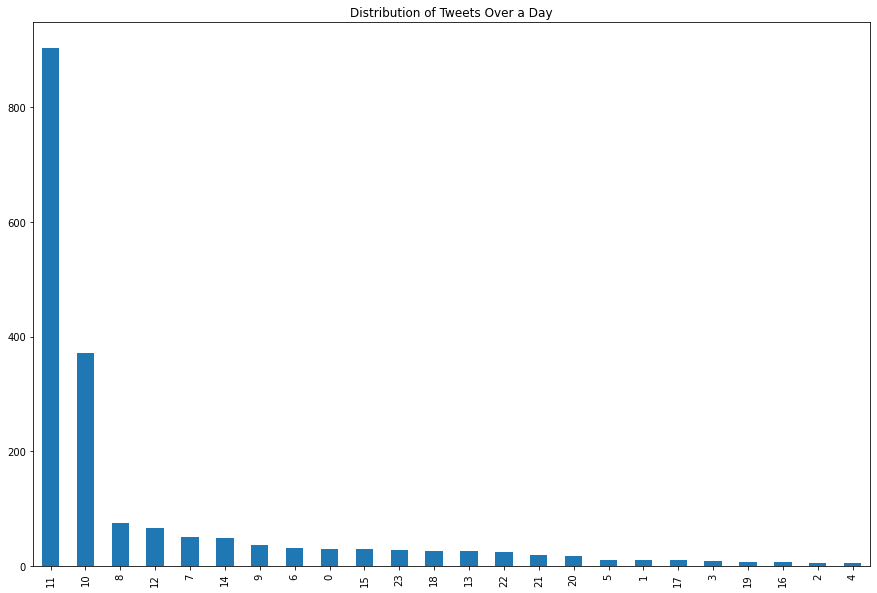

In [44]:
pd.to_datetime(df.tweet_created_at).dt.hour.value_counts().plot(kind='bar',figsize=(15,10))
plt.title('Distribution of Tweets Over a Day')
plt.show()

It seems that most tweets are done around 11am.

## Sentiment of Tweet within Hours
What was the sentiment of tweet within every hour? Will it hold any insights?

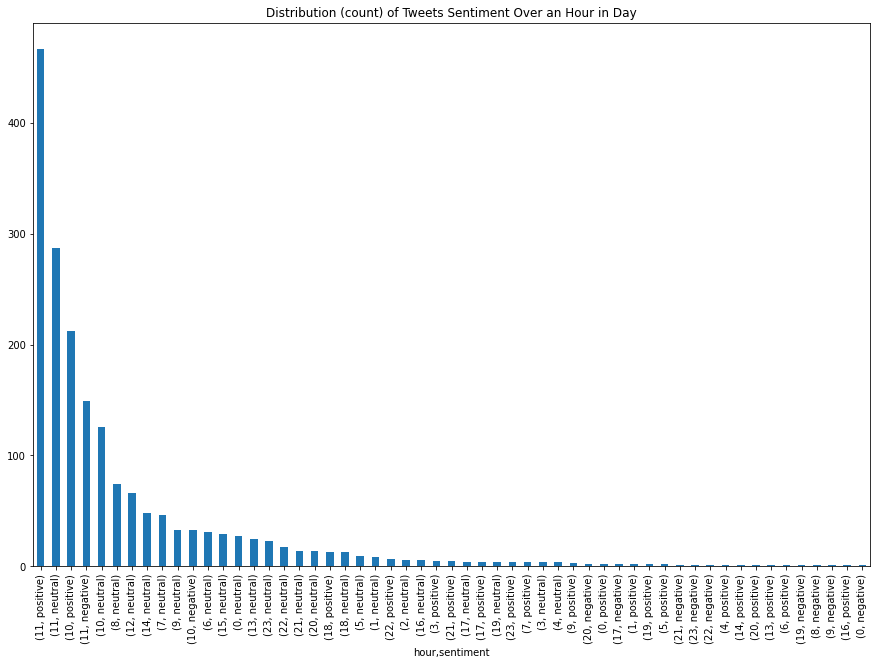

In [49]:
df['hour'] = pd.to_datetime(df.tweet_created_at).dt.hour
df[['hour', 'sentiment']].value_counts().plot(kind='bar',figsize=(15,10))
plt.title('Distribution (count) of Tweets Sentiment Over an Hour in Day')
plt.show()

It does not explain much but we could plot ratios instead of counts.

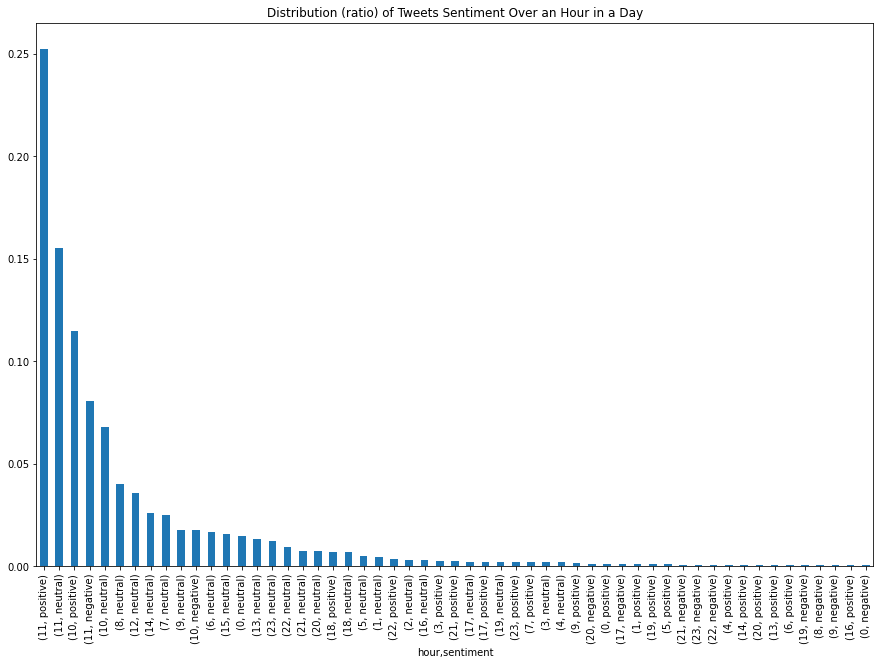

In [50]:
df[['hour', 'sentiment']].value_counts(normalize=True).plot(kind='bar',figsize=(15,10))
plt.title('Distribution (ratio) of Tweets Sentiment Over an Hour in a Day')
plt.show()

Does it hold any insights?

## Word Cloud of Tweets
For the word clouds of the Tweets please refer to [this blog]()!

## Further Analysis
For the further worldcup tweet sentiment analysis, we can find the answers to the following questions:
* What is the distribution of sentiment based upon a source of tweet?
* What is the behaviour of user if they have tweeted multiple times?
* How often does a single user tweets?
* What is the peak hour of negative sentiment tweet and positive sentiment tweets?
* What day has most negative tweets and what has most positive tweets?
* Is there any relationship between days, hour of tweeting vs sentiment?